# Pima Indians Diabetes Database

### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./kernel150594f677.ipynb
./diabetes.csv
./logs/fit/20200725-151531/train/events.out.tfevents.1595686801.Damians-MBP.54959.886.v2
./logs/fit/20200725-151531/train/events.out.tfevents.1595686801.Damians-MBP.profile-empty
./logs/fit/20200725-151531/train/plugins/profile/2020-07-25_15-20-01/local.trace
./logs/fit/20200725-151531/validation/events.out.tfevents.1595686801.Damians-MBP.54959.1115.v2
./.ipynb_checkpoints/kernel150594f677-checkpoint.ipynb


In [2]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#EDA using Pandas Profiling
file = ProfileReport(df)
file.to_file(output_file='output.html')

/anaconda3/envs/aios/lib/python3.6/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [7]:
from scipy.stats import shapiro
stat, p = shapiro(df['BloodPressure'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.819, p=0.000


The p-value is less than 0.001, implying that at 5% Level of Significance (LOS) we reject our null hypothesis (Ho). Therefore, the variable does not follow a normal distribution.

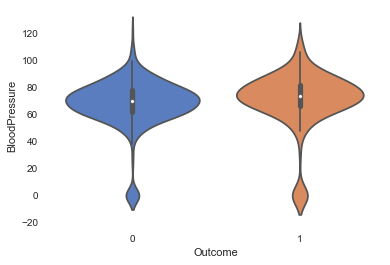

In [5]:
#Classifying the Blood Pressure based on class
ax = sns.violinplot(x='Outcome', y='BloodPressure', data=df, palette='muted', split=True)

In [6]:
#Replacing the zero-values for Blood Pressure
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

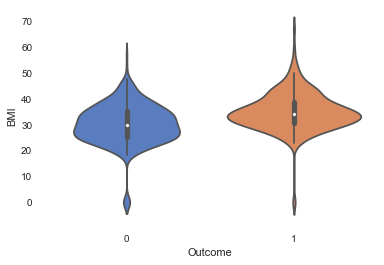

In [7]:
#Classifying the BMI based on class
ax = sns.violinplot(x='Outcome', y='BMI', data=df, palette='muted', split=True)

In [8]:
#Replacing the zero-values for BMI
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'BMI':0}, np.median(df1['BMI']))
df2 = df2.replace({'BMI':0}, np.median(df2['BMI']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

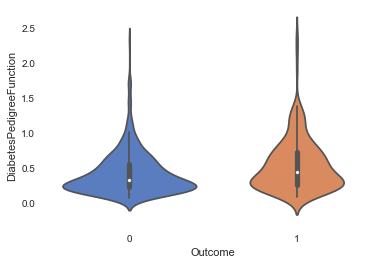

In [9]:
#Classifying the DiabetesPedigreeFunction based on class
ax = sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, palette='muted', split=True)

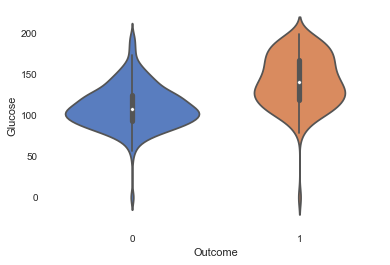

In [10]:
#Classifying the Glucose based on class
ax = sns.violinplot(x='Outcome', y='Glucose', data=df, palette='muted', split=True)

In [11]:
#Replacing the zero-values for Glucose
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'Glucose':0}, np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, np.median(df2['Glucose']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

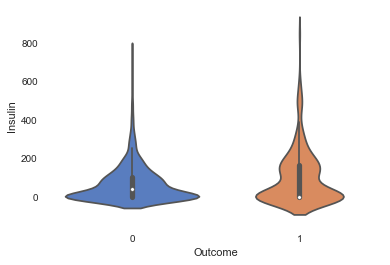

In [12]:
#Classifying the Insulin based on class
ax = sns.violinplot(x='Outcome', y='Insulin', data=df, palette='muted', split=True)

In [13]:
#Replacing the zero-values for Insulin
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'Insulin':0}, np.median(df1['Insulin']))
df2 = df2.replace({'Insulin':0}, np.median(df2['Insulin']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

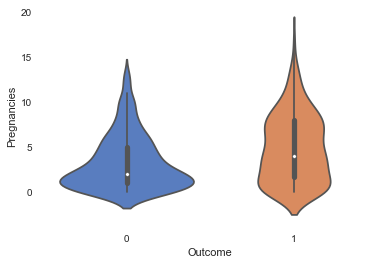

In [14]:
#Classifying the Pregnancies based on class
ax = sns.violinplot(x='Outcome', y='Pregnancies', data=df, palette='muted', split=True)

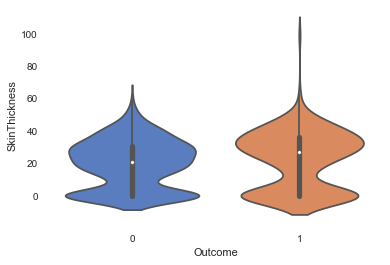

In [15]:
#Classifying the Skin Thickness based on class
ax = sns.violinplot(x='Outcome', y='SkinThickness', data=df, palette='muted', split=True)

In [16]:
#Replacing the zero-values for Skin Thickness
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'SkinThickness':0}, np.median(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness':0}, np.median(df2['SkinThickness']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

In [17]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['Age'], df['Pregnancies'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.544


### Features and Labels

In [18]:
y = df['Outcome']
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
columns = x.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
X = pd.DataFrame(scaled_x, columns = columns)

/anaconda3/envs/aios/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/aios/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Training and Testing Datasets

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [20]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
279,0.342981,-0.153627,1.622041,-0.690362,-0.488510,0.242297,-0.407342,0.404942
258,-0.250952,2.145652,-0.196660,-0.583013,1.001531,0.576785,-0.192914,0.234767
249,0.342981,-0.810564,0.299349,-0.046266,-0.849452,0.460442,-0.283518,1.596171
740,0.342981,-0.153627,1.126031,0.275781,0.122314,0.969445,-0.667073,0.745293
725,0.046014,0.174841,1.291368,-1.763854,0.585060,0.300469,0.380909,-0.445935


In [21]:
y_train.head()

29     0
748    1
719    1
723    0
698    0
Name: Outcome, dtype: int64

### Classification Model Comparison

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [23]:
scores = {}
for name,clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores[name] = score
print(score)

0.75


In [24]:
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
for i in sorted_scores:
    print(i[0], i[1])

Neural Net 0.8879310344827587
Decision Tree 0.8706896551724138
Random Forest 0.853448275862069
Gaussian Process 0.8362068965517241
AdaBoost 0.8017241379310345
Linear SVM 0.7758620689655172
Nearest Neighbors 0.7672413793103449
Naive Bayes 0.75
QDA 0.75
RBF SVM 0.6551724137931034


## Neural Network - Tensorflow
https://drive.google.com/file/d/1Y42Pic0ebkxOz2PrL7hjh3Yj2vE0MVHS/view - the paper associated with this dataset achieved a higher accuracy using a Neural Network.

In [25]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [26]:
%tensorboard --logdir logs

In [27]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [28]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras import Model

In [29]:
from datetime import datetime
from packaging import version

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.0.0


In [30]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

### Define the model
Input Layer -> Fully Connected 64 -> Dropout -> Fully Connected 32 -> Dropout -> Output Layer

In [31]:
X_train.shape

(652, 8)

In [32]:
model = tf.keras.models.Sequential([
  Dense(64, input_shape=(8,), activation='elu'),
  Dropout(0.25),
  Dense(32, activation='elu'),
  Dropout(0.5),
  Dense(1, activation='sigmoid'),
])

In [33]:
loss_fn = tf.keras.losses.MeanSquaredError()

In [34]:
model.compile(optimizer='RMSProp',
              loss=loss_fn,
              metrics=['accuracy'])

In [35]:
model.fit(X_train, y_train, epochs=300, validation_split=0.1, callbacks=[tensorboard_callback])

W0725 17:10:03.090598 4692284864 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 586 samples, validate on 66 samples
Epoch 1/300
586/586 [==============================] - 0s 426us/sample - loss: 0.2040 - accuracy: 0.6860 - val_loss: 0.1525 - val_accuracy: 0.8182
Epoch 2/300
586/586 [==============================] - 0s 58us/sample - loss: 0.1788 - accuracy: 0.7253 - val_loss: 0.1420 - val_accuracy: 0.7879
Epoch 3/300
586/586 [==============================] - 0s 71us/sample - loss: 0.1695 - accuracy: 0.7491 - val_loss: 0.1371 - val_accuracy: 0.8182
Epoch 4/300
586/586 [==============================] - 0s 69us/sample - loss: 0.1626 - accuracy: 0.7594 - val_loss: 0.1357 - val_accuracy: 0.8182
Epoch 5/300
586/586 [==============================] - 0s 64us/sample - loss: 0.1610 - accuracy: 0.7594 - val_loss: 0.1332 - val_accuracy: 0.8182
Epoch 6/300
586/586 [==============================] - 0s 62us/sample - loss: 0.1585 - accuracy: 0.7679 - val_loss: 0.1338 - val_accuracy: 0.8333
Epoch 7/300
586/586 [==============================] - 0s 63us/sample - loss: 

586/586 [==============================] - 0s 52us/sample - loss: 0.1446 - accuracy: 0.7850 - val_loss: 0.1248 - val_accuracy: 0.8333
Epoch 57/300
586/586 [==============================] - 0s 53us/sample - loss: 0.1421 - accuracy: 0.7884 - val_loss: 0.1259 - val_accuracy: 0.8182
Epoch 58/300
586/586 [==============================] - 0s 56us/sample - loss: 0.1458 - accuracy: 0.7884 - val_loss: 0.1263 - val_accuracy: 0.8030
Epoch 59/300
586/586 [==============================] - 0s 55us/sample - loss: 0.1404 - accuracy: 0.8055 - val_loss: 0.1245 - val_accuracy: 0.8333
Epoch 60/300
586/586 [==============================] - 0s 54us/sample - loss: 0.1485 - accuracy: 0.7867 - val_loss: 0.1246 - val_accuracy: 0.8333
Epoch 61/300
586/586 [==============================] - 0s 55us/sample - loss: 0.1444 - accuracy: 0.7850 - val_loss: 0.1239 - val_accuracy: 0.8333
Epoch 62/300
586/586 [==============================] - 0s 55us/sample - loss: 0.1432 - accuracy: 0.7986 - val_loss: 0.1245 - val_a

Epoch 112/300
586/586 [==============================] - 0s 49us/sample - loss: 0.1347 - accuracy: 0.8038 - val_loss: 0.1113 - val_accuracy: 0.8636
Epoch 113/300
586/586 [==============================] - 0s 51us/sample - loss: 0.1361 - accuracy: 0.8003 - val_loss: 0.1115 - val_accuracy: 0.8636
Epoch 114/300
586/586 [==============================] - 0s 48us/sample - loss: 0.1342 - accuracy: 0.8003 - val_loss: 0.1108 - val_accuracy: 0.8636
Epoch 115/300
586/586 [==============================] - 0s 49us/sample - loss: 0.1332 - accuracy: 0.8038 - val_loss: 0.1103 - val_accuracy: 0.8636
Epoch 116/300
586/586 [==============================] - 0s 49us/sample - loss: 0.1398 - accuracy: 0.7986 - val_loss: 0.1106 - val_accuracy: 0.8485
Epoch 117/300
586/586 [==============================] - 0s 47us/sample - loss: 0.1369 - accuracy: 0.8089 - val_loss: 0.1097 - val_accuracy: 0.8636
Epoch 118/300
586/586 [==============================] - 0s 51us/sample - loss: 0.1424 - accuracy: 0.7935 - val_

586/586 [==============================] - 0s 51us/sample - loss: 0.1321 - accuracy: 0.8174 - val_loss: 0.0942 - val_accuracy: 0.8636
Epoch 168/300
586/586 [==============================] - 0s 53us/sample - loss: 0.1190 - accuracy: 0.8464 - val_loss: 0.0942 - val_accuracy: 0.8485
Epoch 169/300
586/586 [==============================] - 0s 49us/sample - loss: 0.1221 - accuracy: 0.8328 - val_loss: 0.0940 - val_accuracy: 0.8636
Epoch 170/300
586/586 [==============================] - 0s 52us/sample - loss: 0.1196 - accuracy: 0.8430 - val_loss: 0.0934 - val_accuracy: 0.8636
Epoch 171/300
586/586 [==============================] - 0s 45us/sample - loss: 0.1224 - accuracy: 0.8379 - val_loss: 0.0929 - val_accuracy: 0.8636
Epoch 172/300
586/586 [==============================] - 0s 48us/sample - loss: 0.1183 - accuracy: 0.8413 - val_loss: 0.0927 - val_accuracy: 0.8636
Epoch 173/300
586/586 [==============================] - 0s 49us/sample - loss: 0.1199 - accuracy: 0.8515 - val_loss: 0.0925 -

586/586 [==============================] - 0s 48us/sample - loss: 0.0988 - accuracy: 0.8703 - val_loss: 0.0786 - val_accuracy: 0.8788
Epoch 223/300
586/586 [==============================] - 0s 45us/sample - loss: 0.1059 - accuracy: 0.8464 - val_loss: 0.0789 - val_accuracy: 0.8788
Epoch 224/300
586/586 [==============================] - 0s 51us/sample - loss: 0.1050 - accuracy: 0.8703 - val_loss: 0.0802 - val_accuracy: 0.8788
Epoch 225/300
586/586 [==============================] - 0s 47us/sample - loss: 0.1063 - accuracy: 0.8601 - val_loss: 0.0790 - val_accuracy: 0.8788
Epoch 226/300
586/586 [==============================] - 0s 52us/sample - loss: 0.1032 - accuracy: 0.8618 - val_loss: 0.0797 - val_accuracy: 0.8788
Epoch 227/300
586/586 [==============================] - 0s 47us/sample - loss: 0.1068 - accuracy: 0.8567 - val_loss: 0.0812 - val_accuracy: 0.8788
Epoch 228/300
586/586 [==============================] - 0s 55us/sample - loss: 0.1070 - accuracy: 0.8584 - val_loss: 0.0803 -

586/586 [==============================] - 0s 49us/sample - loss: 0.0956 - accuracy: 0.8652 - val_loss: 0.0748 - val_accuracy: 0.9091
Epoch 278/300
586/586 [==============================] - 0s 50us/sample - loss: 0.0903 - accuracy: 0.8823 - val_loss: 0.0764 - val_accuracy: 0.9091
Epoch 279/300
586/586 [==============================] - 0s 50us/sample - loss: 0.0950 - accuracy: 0.8703 - val_loss: 0.0757 - val_accuracy: 0.9091
Epoch 280/300
586/586 [==============================] - 0s 58us/sample - loss: 0.0934 - accuracy: 0.8788 - val_loss: 0.0755 - val_accuracy: 0.9242
Epoch 281/300
586/586 [==============================] - 0s 62us/sample - loss: 0.0932 - accuracy: 0.8788 - val_loss: 0.0741 - val_accuracy: 0.9091
Epoch 282/300
586/586 [==============================] - 0s 46us/sample - loss: 0.0973 - accuracy: 0.8669 - val_loss: 0.0740 - val_accuracy: 0.9242
Epoch 283/300
586/586 [==============================] - 0s 47us/sample - loss: 0.0882 - accuracy: 0.8840 - val_loss: 0.0754 -

In [36]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

W0725 17:10:47.524053 4692284864 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


116/116 [==============================] - 0s 61us/sample - loss: 0.0734 - accuracy: 0.9052
test loss, test acc: [0.07343465911931005, 0.9051724]
